<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_10_Herhalingslabo_Opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:purple"> Labo 10 - Herhalingslabo

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model


pd.set_option('display.max_columns', 500)

 ## <span style="color:darkorange"> Discrete kansverdelingen

Oef 1: Het aantal fouten in een glasvezelkabel volgt een Poisson kansverdeling. Veronderstel dat het gemiddeld aantal fouten in 50 meter kabel 1,2 bedraagt.

a. Wat is de kans dat er exact 3 fouten in 150 meter glasvezelkabel zitten?

In [ ]:
kansa = stats.poisson.pmf(3,(150/50)*1.2)
print(kansa)


0.21246926575014705


b. Wat is de kans dat er minstens twee fouten in 100 meter glasvezelkabel zitten?

In [54]:
kansb = 1 - stats.poisson.cdf(1,2.4)
print(kansb)

0.6915589588159976


c. Wat is de kans dat er in 200 meter kabel minder dan 2 fouten zitten?

In [59]:
 kansc = stats.poisson.cdf(1,4.8)
 print(kansc)

0.04773253288431617


d. Een glasvezelkabel is 100 meter lang. Wat is de kans dat er in de eerste 50 meter exact 1 fout zit en exact 1 fout in de tweede 50 meter?

In [60]:
kansd = stats.poisson.pmf(1,1.2) *  stats.poisson.pmf(1,1.2)
print(kansd)

0.13063385273675404


Oef 2: De bus van 8u30 is 30% van de keren te laat. Beantwoord onderstaande vragen:

a. Wat is de kans dat de bus de volgende week (= 7 dagen) nooit te laat zal zijn? Welke kansverdeling zal je hiervoor hanteren?

In [63]:
pr = stats.binom.pmf(0,7,0.3)
print(pr)

0.08235430000000003


b. Wat is de kans dat de bus meer dan 4 van de zeven dagen te laat zal  zijn?

In [64]:
kansdatb = 1 - stats.binom.cdf(4,7,0.3)
print(kansdatb)

0.028795499999999974


c. Wat is de kans dat de komende maand (= 30 dagen) de bus exact 10 dagen te laat zal zijn?

In [ ]:
kansdatc = stats.binom.pmf(10,30,0.3)
print(kansdatc)

0.14156170106200108


d. Wat is de kans dat de komende maand de bus minder dan 7 dagen te laat zal zijn?

In [ ]:
kansdatd = stats.binom.cdf(6,30,0.3)
print(kansdatd)

0.15952298219587446


Bepaal het aantal dagen per maand waarvoor er minder dan 10 procent kans bestaat dat de bus er meer dan dit aantal te laat zal zijn.

In [ ]:
kanse = stats.binom.isf(0.1,30,0.3)
print(kanse)

12.0


 ## <span style="color:darkorange"> Normaalverdeling

Oef 3: De levensduur van een toestel is normaal verdeeld met een gemiddelde van 12 maanden en een standaardafwijking van 2 maanden.

a. Bepaal de kans dat het toestel binnen de 7 maanden stuk gaat.

In [ ]:
stats.norm.cdf(7,12,2)

np.float64(0.006209665325776132)

b. Bepaal de kans dat het toestel langer dan 15 maanden meegaat.

In [ ]:
 kansbtoestel =  1- stats.norm.cdf(15,12,2)
 print(kansbtoestel)

0.06680720126885809


c. Bepaal de kans dat het toestel tijdens de 10de maand stuk gaat.

In [ ]:
kansctoestel = stats.norm.cdf(10,12,2) - stats.norm.cdf(9,12,2)
print(kansctoestel)

0.091848052662599


d. Binnen hoeveel tijd gaan de 10% minst duurzame toestellen stuk?

In [ ]:
 print(stats.norm.ppf(0.1,12,2))

9.4368968689108


 ## <span style="color:darkorange"> Data cleaning en regressie

Oef 4: De dataset autos.csv bevat gegevens gegevens van tweedehands auto's die op Ebay worden verkocht.
Werk onderstaande vragen uit.

In [ ]:
dataset= pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
# Hoveel rijen bevat de dataset?
dataset.shape[0]



371528

Verwijder de volgende kolommen: 'dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'

In [ ]:
# Verwijderen van de kolom seller
dataset_clean = dataset.drop(['dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'], axis=1)
dataset_clean.head()


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda


Geef een overzicht van hoeveel ontbrekende waarden er in elke kolom van de dataset voorkomen.

In [ ]:
# Aantal ontbrekende waarden
dataset.isnull().sum()


,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209
powerPS,0


Verwijder alle rijen met ontbrekende waarden (listwise deletion)

In [65]:
# Verwijder alle rijen met ontbrekende waarden (listwise deletion)
dataset_clean.dropna(inplace=True)
dataset_clean.isnull().sum()



,0
name,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
gearbox,0
powerPS,0
model,0
kilometer,0
fuelType,0


In [ ]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.609560e+05,260956.000000,260956.000000,260956.000000,260956.000000,260956.0,260956.000000
mean,8.208628e+03,2003.309500,126.332366,124058.672726,6.182552,0.0,51818.711177
std,3.433091e+05,6.512161,145.277559,39848.176772,3.471359,0.0,25843.428111
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.500000e+03,1999.000000,78.000000,100000.000000,3.000000,0.0,31226.000000
50%,3.850000e+03,2004.000000,116.000000,150000.000000,6.000000,0.0,51103.000000
75%,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,72766.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Verwijder alle rijen waarbij de numerieke waarden gelijk zijn aan 0.
Verwijder alle rijen waarbij het aantal pk (powerPS) kleiner is dan 10

In [66]:
# Verwijderen van onrealistische waarden
dataset_clean = dataset_clean.drop(dataset_clean[dataset_clean['price']==0].index)
dataset_clean = dataset_clean.drop(dataset_clean[dataset_clean['powerPS'] < 10].index)


Verwijder in de kolommen 'price' en 'powerPS' alle uitschieters. Beschouw uitschieters hier als de waarden die meer dan 10 standaardafwijkingen van het gemiddelde zijn gelegen.

In [67]:
dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['price'])) < 10)]
dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['powerPS'])) < 10)]

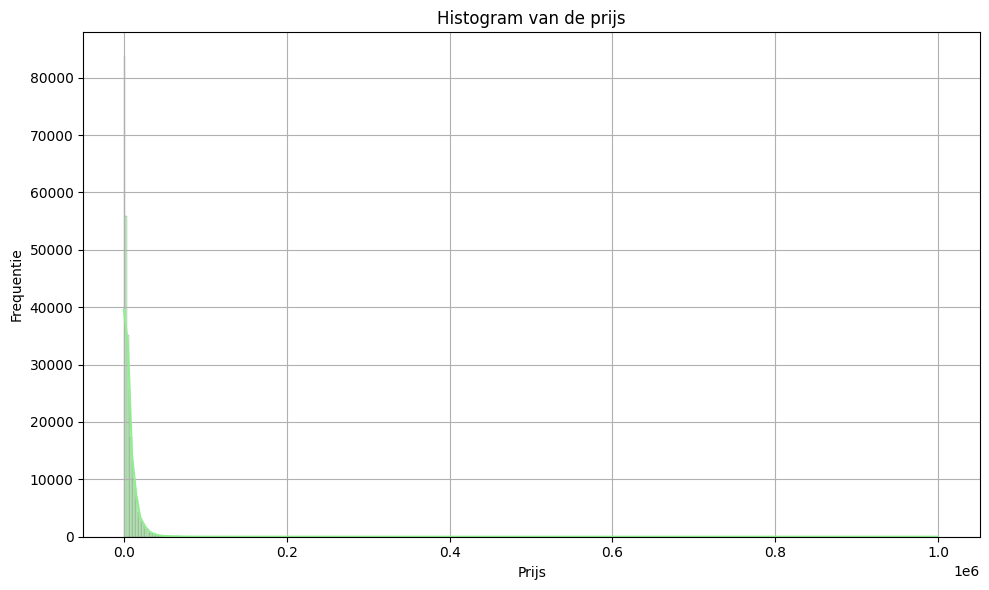

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#bepaal de klassenbreedte
klassenbreedte = (dataset_clean['price'].max() - dataset_clean['price'].min()) / np.sqrt(dataset_clean['price'].count())
bins = np.arange(dataset_clean['price'].min(),dataset_clean['price'].max() + klassenbreedte,klassenbreedte)
#teken histogram
plt.figure(figsize=(10,6))
sns.histplot(dataset_clean['price'],bins=bins,kde=True,color='lightgreen')
plt.title('Histogram van de prijs')
plt.xlabel('Prijs')
plt.ylabel('Frequentie')
plt.grid(True)
plt.tight_layout()
plt.show()




Teken een histogram van de prijs (price). Bepaal op voorhand het aantal klasses en geef dit aantal mee met de bin parameter van de functie sns.distplot().

Text(0, 0.5, 'Frequentie')

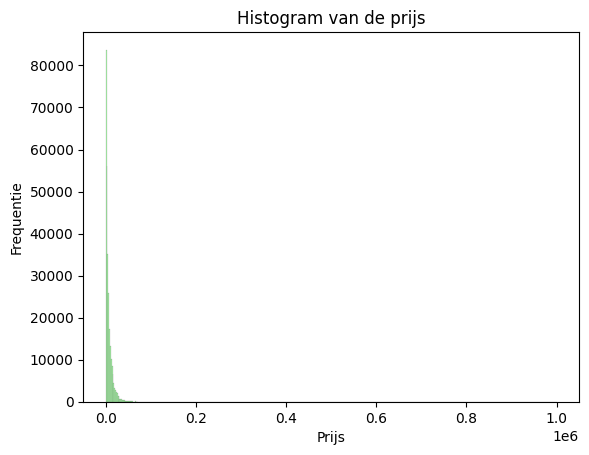

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bepaal klassenbreedte
class_width = (dataset_clean['price'].max() - dataset_clean['price'].min()) / np.sqrt(dataset_clean['price'].count())
bins = np.arange(dataset_clean['price'].min(), dataset_clean['price'].max() + class_width, class_width)

# Teken histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_clean['price'], bins=bins, kde=True, color='lightgreen')
plt.title('Histogram van de prijs')
plt.xlabel('Prijs')
plt.ylabel('Frequentie')
plt.grid(True)
plt.tight_layout()
plt.show()


Stel grafisch de verdeling van 'fuel_Type'weer. Gebruik sns.countplot(). Wat is het populairste brandstoftype?

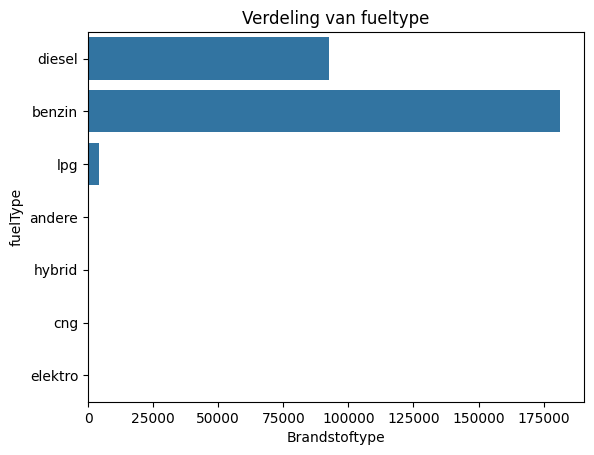

In [75]:
sns.countplot(dataset_clean['fuelType'])
plt.title('Verdeling van fueltype')
plt.xlabel('Brandstoftype')
plt.show()

Stel grafisch de verdeling van 'gearbox' weer. Wat is de populairste transmissie?

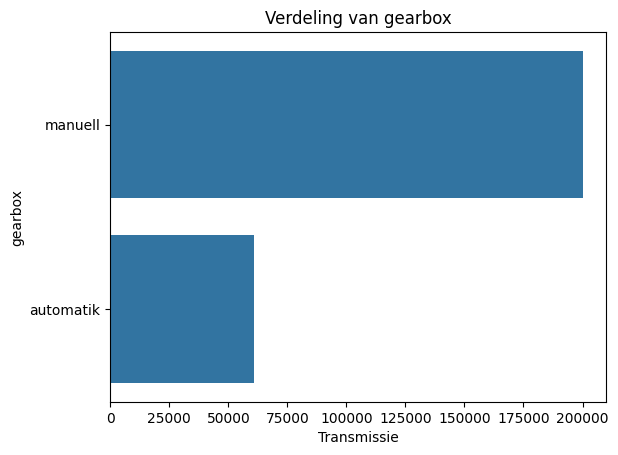

In [ ]:
# Verdeling van gearbox
sns.countplot(dataset_clean['gearbox'])
plt.title('Verdeling van gearbox')
plt.xlabel('Transmissie')
plt.show()



Controleer of auto's met een automatische versnellingbak duurder zijn dan deze met een manuele versnellingsbak. Gebruik hiervoor een boxplot. Wat zijn de conclusies?

([<matplotlib.axis.XTick at 0x78c8495c0990>,
 [Text(1, 0, 'manuell'), Text(2, 0, 'automatik')])

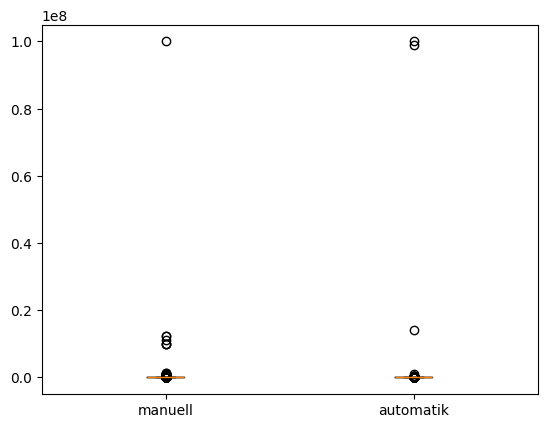

In [76]:
plt.boxplot([dataset[dataset['gearbox'] == 'manuell'] ['price'],dataset[dataset['gearbox'] == 'automatik' ]['price']])
plt.xticks([1,2],['manuell','automatik'])

automatik is duurder

Wat is het populairste automerk en wat is het populairste model van dat merk?

In [78]:
car_count = dataset_clean['brand'].value_counts()
car_count
car = car_count.idxmax()
print(f" die auto die het populairst is: {car} ")
model_count = dataset_clean['model'].value_counts()
model_count
model = model_count.idxmax()
print(f" Het model die het populairst is: {model}")

 die auto die het populairst is: volkswagen 
 Het model die het populairst is: golf


Voeg een extra kolom toe aan de dataset met daarin de leeftijd van de auto's. Deze leeftijd kan je berekenen als (2018 - yearOfRegistration)

In [80]:
# Invoegen van de leeftijd
dataset_clean['leeftijd'] = 2018 - dataset_clean['yearOfRegistration']
dataset_clean.head()


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,leeftijd
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,14
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,10
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,23
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,14


Welke variabele lijkt het meeste invloed te hebben op de prijs? De leeftijd of het kilometeraantal?
Baseer je op de correlatiecoëfficiënt.

In [84]:
numeriek = dataset_clean.select_dtypes(include=['number'])
correlaties = numeriek.corr(method='pearson')
print("Correlatiematrix:\n",correlaties)
print("\nCorrelatie met prijs:")
print(correlaties['price'].sort_values(ascending=False))

Correlatiematrix:
                        price  yearOfRegistration   powerPS  kilometer  \
price               1.000000            0.317645  0.457814  -0.347813   
yearOfRegistration  0.317645            1.000000  0.217804  -0.398524   
powerPS             0.457814            0.217804  1.000000  -0.022729   
kilometer          -0.347813           -0.398524 -0.022729   1.000000   
leeftijd           -0.317645           -1.000000 -0.217804   0.398524   

                    leeftijd  
price              -0.317645  
yearOfRegistration -1.000000  
powerPS            -0.217804  
kilometer           0.398524  
leeftijd            1.000000  

Correlatie met prijs:
price                 1.000000
powerPS               0.457814
yearOfRegistration    0.317645
leeftijd             -0.317645
kilometer            -0.347813
Name: price, dtype: float64


Iemand wil een auto kopen van 2014 of jonger. Deze auto mag maximaal 50000 km op de teller staan hebben. Toon de auto's die aan deze eisen voldoen.

In [86]:
dataset_clean[(dataset_clean['leeftijd'] >= 2014) & (dataset_clean['kilometer']<= 50000)]
dataset_clean.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,leeftijd
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,14
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,10
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,23
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,14


[17846.62401884]
0.534006578616511


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


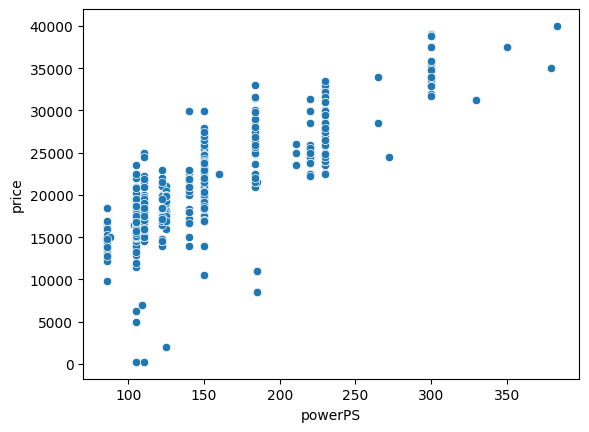

In [89]:
vw_golf_4yrs = dataset_clean[(dataset_clean['brand'] == 'volkswagen') &
                             (dataset_clean['model'] == 'golf') &
                             (dataset_clean['leeftijd'] == 4)]

# Scatter
sns.scatterplot(x='powerPS', y='price', data=vw_golf_4yrs)

# Regressie
reg = linear_model.LinearRegression()
reg.fit(vw_golf_4yrs[['powerPS']], vw_golf_4yrs['price'])

# Voorspelling
print(reg.predict([[120]]))

# R² score
print(reg.score(vw_golf_4yrs[['powerPS']], vw_golf_4yrs['price']))


[17846.62401884]
0.534006578616511


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


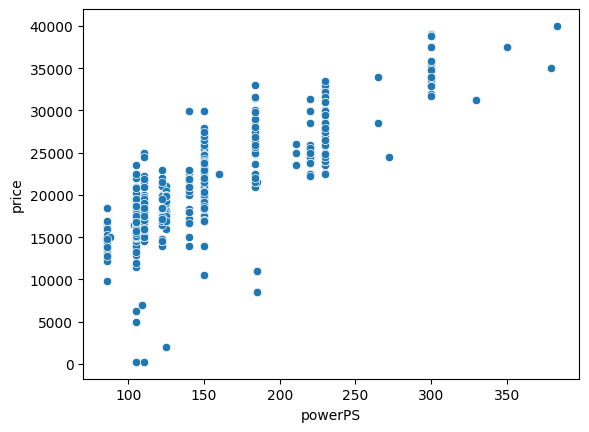

In [91]:
vw_golf_4yrs = dataset_clean[(dataset_clean['brand'] == 'volkswagen')&
                              (dataset_clean['model'] == 'golf') &
                              (dataset_clean['leeftijd'] == 4)]

sns.scatterplot(x='powerPS',y='price',data=vw_golf_4yrs)

reg = linear_model.LinearRegression()
reg.fit(vw_golf_4yrs[['powerPS']],vw_golf_4yrs['price'])
print(reg.predict([[120]]))
print(reg.score(vw_golf_4yrs[['powerPS']],vw_golf_4yrs['price']))



Maak een nieuw dataframe met volkswagen golf met een leeftijd van 4 jaar

Teken op basis van dit dataframe een scatterplot met op de x-as het vermogen van de auto en op de y-as de prijs van de auto.

Bepaal vervolgens de regressielijn tussen het vermogen en de prijs.

Voorspel wat een volkswagen golf van 4 jaar oud met een vermogen van 120pk naar verwachting zou kosten.

Bepaal vervolgens de determinatiecoëfficiënt (R²-waarde) van dit regressiemodel.